In [2]:
import numpy.random as rd
import matplotlib.pyplot as plt
from math import *
import ipywidgets as widgets

# Somme de variables aléatoires indépendantes et loi des grands nombres


Considérons une suite de variables aléatoires $(X_i)_{i\geq 0}$ indépendantes et toutes de même loi. On peut étudier la suite des sommes partielles $S_n = \sum_{i=1}^n X_i$ pour savoir comment cette suite se comporte.

On peut aussi étudier la moyenne des $n$ premières variables $Y_n = \frac1n S_n =\frac{1}{n} \sum_{i=1}^n X_i$, aussi appelée *moyenne empirique*; soulignons qu'il s'agit d'une variable aléatoire (des valeurs différentes des $X_i$ donnent des valeurs différentes de $Y_n$).
La **loi des grands nombres** énonce que si les $X_i$ admettent un espérance finie $\mu$ (toutes les variables ont alors la même espérance car elles sont de même loi), alors la suite $(Y_n)_{n\geq 1}$ "se rapproche" de $\mu$ dans le sens suivant:
$$
 \forall \epsilon>0\,, \qquad \mathbb{P}\big( |Y_n -\mu| >\epsilon \big) =0 \, .
$$
(On peut en fait montrer que l'événement "la suite $(Y_n)_{n\geq 1}$ converge vers $\mu$" est de probabilité 1!)

Par exemple, si $A_1,A_2, \ldots$ sont des événements indépendants de même probabilité $p$,
alors en considérant les variables aléatoires $X_i=\mathbf{1}_{A_i}$, qui sont des variables aléatoires de Bernoulli de paramètre $p$, la loi des grands nombres stipule que la proportion $\frac{1}{n} \sum_{i=1}^n \mathbf{1}_{A_i}$
d'événements réalisés "converge" vers $\mu =\mathbb{E}(X_1)=p$, dans le sens ci-dessus. 


## Illustration de la loi des grands nombres

Illustrons le comportement (aléatoire) d'une somme de variables aléatoires $S_n = \sum_{i=1}^n X_i$ (que l'on peut comparer à $n\mathbb{E}(X_1)$) et de la moyenne empirique $Y_n = \frac1n S_n$, dans plusieurs exemples.

#### Variables aléatoires de Bernoulli

Vous pouvez changer la valeur du paramètre $p$ (et de $n$) comme vous le souhaitez. Exécutez la cellule plusieurs fois.

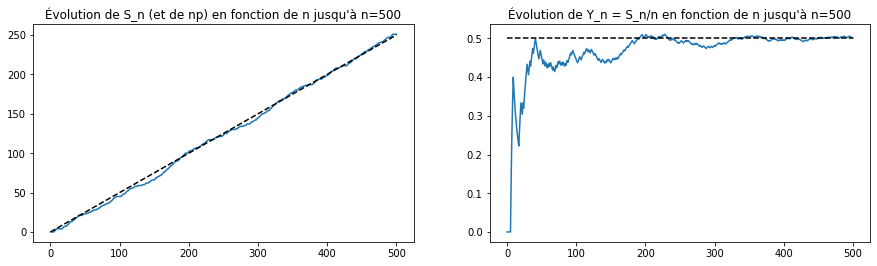

In [83]:
p=0.5
def Bern(p):
    if rd.random()<p:
        return 1
    else:
        return 0

n=500
S=[0]
L=[0]
for i in range(n):
    x=Bern(p)
    S.append(S[i]+x)
    L.append((i+1)*L[i]/(i+2) +x/(i+2))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].title.set_text("Évolution de S_n (et de np) en fonction de n jusqu'à n={}".format(n))
axes[0].plot(S)
axes[0].plot([0,n],[0,p*n],'--', color='black')
axes[1].title.set_text("Évolution de Y_n = S_n/n en fonction de n jusqu'à n={}".format(n))
axes[1].plot(L)
axes[1].plot([0,n],[p,p],'--',color='black')
plt.show()

#### Cas d'une variable aléatoire uniforme

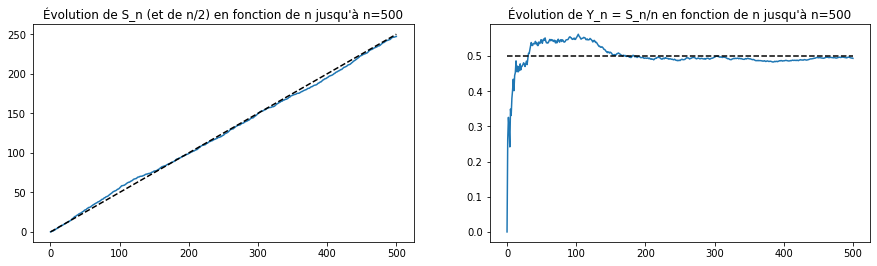

In [82]:
n=500
S=[0]
L=[0]
for i in range(n2):
    x=rd.random()
    S.append(S[i]+x)
    L.append((i+1)*L[i]/(i+2) +x/(i+2))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].title.set_text("Évolution de S_n (et de n/2) en fonction de n jusqu'à n={}".format(n))
axes[0].plot(S)
axes[0].plot([0,n],[0,0.5*n],'--', color='black')
axes[1].title.set_text("Évolution de Y_n = S_n/n en fonction de n jusqu'à n={}".format(n))
axes[1].plot(L)
axes[1].plot([0,n],[0.5,0.5],'--',color='black')
plt.show()

#### Cas d'une variable aléatoire normale

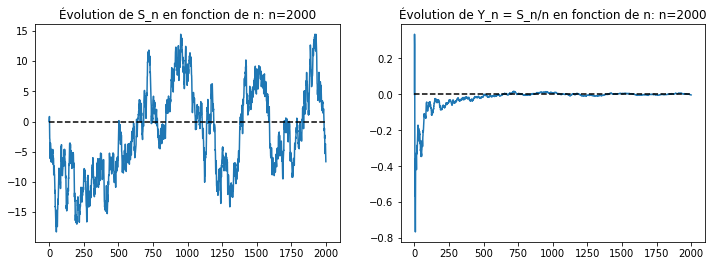

In [79]:
n=2000
S=[0]
L=[0]
for i in range(n):
    x=rd.normal(0,1)
    S.append(S[i]+x)
    L.append((i+1)*L[i]/(i+2) +x/(i+2))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].title.set_text("Évolution de S_n en fonction de n jusqu'à n={}".format(n))
axes[0].plot(S)
axes[0].plot([0,n],[0,0],'--', color='black')
axes[1].title.set_text("Évolution de Y_n = S_n/n en fonction de n jusqu'à n={}".format(n))
axes[1].plot(L)
axes[1].plot([0,n],[0,0],'--',color='black')
plt.show()

## Le cas d'une variable qui n'admet pas d'espérance: Cauchy

Représentons trois suites indépendantes.

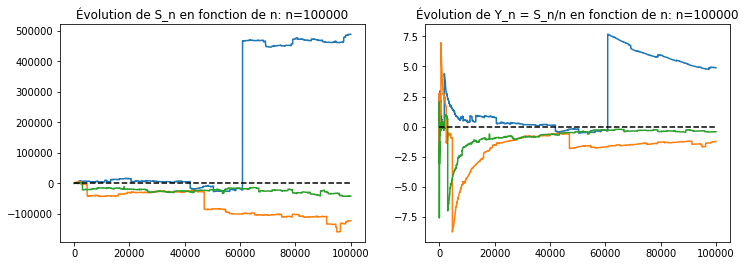

In [85]:
n=100000

def SuiteCauchy(n):
    S=[0]
    L=[0]
    for i in range(n):
        x=rd.standard_cauchy()
        S.append(S[i]+x)
        L.append((i+1)*L[i]/(i+2) +x/(i+2))
    return S,L

S1,L1=SuiteCauchy(n4)
S2,L2=SuiteCauchy(n4)
S3,L3=SuiteCauchy(n4)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].title.set_text("Évolution de S_n en fonction de n: n={}".format(n))
axes[0].plot(S1)
axes[0].plot(S2)
axes[0].plot(S3)
axes[0].plot([0,n],[0,0],'--', color='black')
axes[1].title.set_text("Évolution de Y_n = S_n/n en fonction de n: n={}".format(n))
axes[1].plot(L1)
axes[1].plot(L2)
axes[1].plot(L3)
axes[1].plot([0,n],[0,0],'--',color='black')
plt.show()